# Email Spam Detection using Supervised Learning
Austin Townsend

January 2025

CU Boulder

## Project Overview

### Project Topic
This project focuses on developing an automated email spam detection system using supervised machine learning techniques. We will implement and compare two different classification algorithms, specifically Random Forest and Support Vector Machine (SVM), to classify emails as either spam or legitimate (ham) based on their text content. This represents a clear classification problem in the realm of supervised learning.

The system will learn from a labeled dataset of emails obtained from Kaggle, where each email is already marked as either spam or ham. This is a supervised learning problem because the data is already labeled for us. By analyzing patterns in the text of known spam and ham emails, our models will learn to identify characteristics that distinguish between the two categories.

### Project Goals and Importance
Email remains one of the most crucial tools for digital communication, especially in business settings, but there is a growing distrust of emails and businesses are constantly fighting to filter spam emails. According to Statista, nearly half of all emails worldwide are spam, creating a significant barrier to effective communication and eroding user trust in email systems. This flood of unwanted messages not only wastes time and resources but also poses security risks through phishing attempts and malicious content.

Through this project, I aim to address this challenge by developing an effective spam detection system. By comparing Random Forest and SVM classifiers, I hope to identify reliable approaches for automatically filtering unwanted emails. This work will contribute to the broader effort of making email a more reliable and trustworthy communication medium.

## The Data

The dataset consists of 5,157 unique email messages with their corresponding classifications. I sourced this data from Kaggle.

### Citation
Ibrahim, A. W. (2023). Spam Emails [Dataset]. Kaggle. Retrieved from https://www.kaggle.com/datasets/abdallahwagih/spam-emails

### Data Structure
- Number of samples (rows): 5,157
- Number of features (columns): 2
- Data size: 480.13kb

### Features
1. Message (Text data):
   - Contains the full email content including subject and body
   - Unstructured text data with varying lengths
   - Contains mixed content (words, numbers, special characters)

2. Category (Categorical data):
   - Binary classification: "Spam" or "Ham" (Non-Spam)
   - Class distribution:
     * Ham: 87% (approximately 4,487 samples)
     * Spam: 13% (approximately 670 samples)
   - Notable class imbalance that will need to be addressed in our modeling approach

### Data Characteristics
- The dataset is structured in a single table format
- Text data is in English language
- No missing values in either column
- Clear class imbalance present (87/13 split)
- Raw text data will require preprocessing before model training



## Data Cleaning

Let's start by loading some core libraries and data, and examine what cleaning steps we may be able to take on the data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# read the data into a file variable
df = pd.read_csv('spam.csv')

print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (5572, 2)

Missing values:
Category    0
Message     0
dtype: int64

First few rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


### Initial Results

So far we can see that our data contains 5,572 emails with no missing values. I'm going to continue by performing some basic cleaning steps, outlined below.

1. Remove any duplicate messages
2. Clean the text data by:
   - Converting to lowercase (to reduce dimensionality)
   - Trimming extra whitespace
3. Verify the cleaning results


In [5]:
# removing duplicates
print("Original number of rows:", len(df))
print("Number of duplicates:", df.duplicated().sum())

df = df.drop_duplicates()
print("\nNumber of rows after removing duplicates:", len(df))

Original number of rows: 5157
Number of duplicates: 0

Number of rows after removing duplicates: 5157


### Duplication Removal Results

After removing duplicates we can see that we were able to remove 415 rows. Let's continue by cleaning the remaining text data.

In [7]:
# basic text cleaning
def clean_text(text):
    text = text.lower()
    text = ' '.join(text.split())
    return text

# cleaning the message column
df['Message_Clean'] = df['Message'].apply(clean_text)

# before after for analysis
print("Original:", df['Message'].iloc[0])
print("Cleaned:", df['Message_Clean'].iloc[0])

# report final number of samples (should be the same as above, 5157)
n_samples = len(df)
print(f"\nFinal number of samples: {n_samples}")

Cleaning text data...

Example of cleaning results:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned: go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...

Final number of samples: 5157


### Visualize Class Distribution After Cleaning

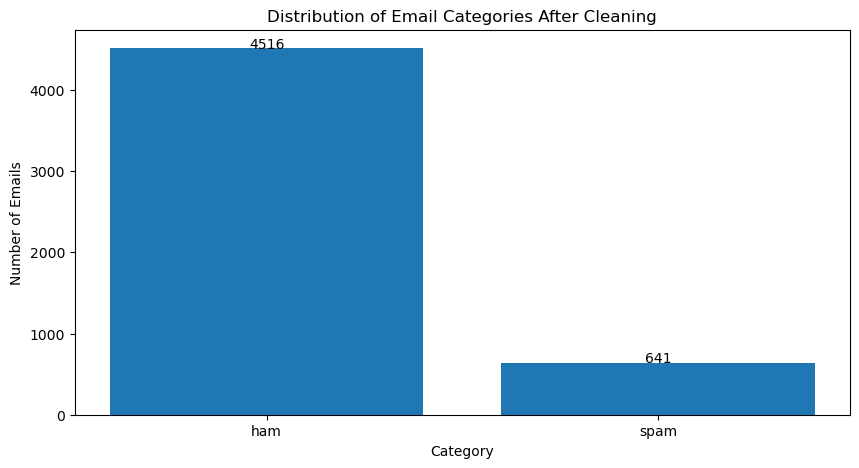

Spam percentage: 12.43%
Ham percentage: 87.57%


In [10]:
plt.figure(figsize=(10, 5))
class_counts = df['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Distribution of Email Categories After Cleaning')
plt.xlabel('Category')
plt.ylabel('Number of Emails')
for i, v in enumerate(class_counts.values):
    plt.text(i, v, str(v), ha='center')
plt.show()

spam_percent = (class_counts['spam'] / len(df)) * 100
ham_percent = (class_counts['ham'] / len(df)) * 100
print(f"Spam percentage: {spam_percent:.2f}%")
print(f"Ham percentage: {ham_percent:.2f}%")

### Data Cleaning Summary

The following cleaning steps were performed on the dataset:

1. **Duplicate Removal**
   - Found and removed 415 duplicate entries
   - Reduced dataset from 5,572 to 5,157 samples
   - Rationale: Duplicates could bias our model and leak information between train/test sets

2. **Text Cleaning**
   - Converted all text to lowercase for consistency
   - Removed extra whitespace to standardize formatting
   - Created 'Message_Clean' column to preserve original data
   - Rationale: Standardization helps ensure consistent feature extraction

**Key Findings**
- Final dataset contains 5,157 unique emails
- Class distribution:
  * Ham: 87.57%
  * Spam: 12.43%
- Notable class imbalance will need to be addressed during modeling

**Analysis Strategy**

Based on our cleaning results, we will need to:
1. Use text vectorization techniques on our cleaned messages
2. Consider techniques to handle class imbalance during model training
3. Ensure our train/test split preserves the class distribution

## Exploratory Data Analysis

### Basic Text Analysis

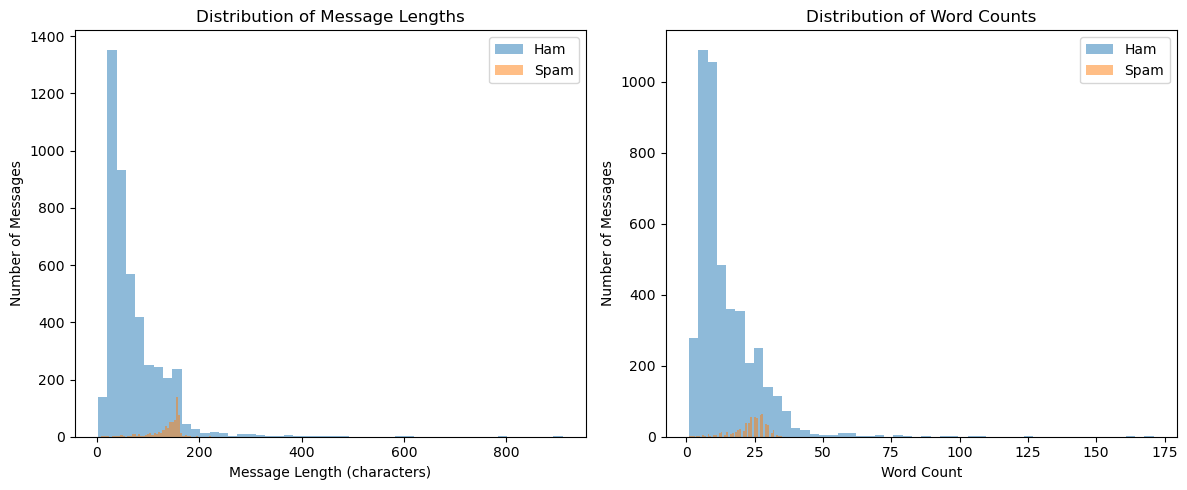


Summary Statistics:

Message Length:
           count        mean        std  min    25%    50%    75%    max
Category                                                                
ham       4516.0   70.779894  56.590842  2.0   34.0   53.0   91.0  910.0
spam       641.0  137.118565  30.399707  7.0  130.0  148.0  157.0  223.0

Word Count:
           count       mean        std  min   25%   50%   75%    max
Category                                                            
ham       4516.0  14.239814  11.179471  1.0   7.0  11.0  19.0  171.0
spam       641.0  23.659906   6.038659  1.0  21.0  25.0  28.0   35.0


In [14]:
df['length'] = df['Message_Clean'].str.len()
df['word_count'] = df['Message_Clean'].str.split().str.len()

plt.figure(figsize=(12, 5))

# plot 1: message length distribution
plt.subplot(1, 2, 1)
plt.hist(df[df['Category']=='ham']['length'], alpha=0.5, label='Ham', bins=50)
plt.hist(df[df['Category']=='spam']['length'], alpha=0.5, label='Spam', bins=50)
plt.xlabel('Message Length (characters)')
plt.ylabel('Number of Messages')
plt.title('Distribution of Message Lengths')
plt.legend()

# plot 2: word count distribution
plt.subplot(1, 2, 2)
plt.hist(df[df['Category']=='ham']['word_count'], alpha=0.5, label='Ham', bins=50)
plt.hist(df[df['Category']=='spam']['word_count'], alpha=0.5, label='Spam', bins=50)
plt.xlabel('Word Count')
plt.ylabel('Number of Messages')
plt.title('Distribution of Word Counts')
plt.legend()

plt.tight_layout()
plt.show()

print("\nSummary Statistics:")
print("\nMessage Length:")
print(df.groupby('Category')['length'].describe())
print("\nWord Count:")
print(df.groupby('Category')['word_count'].describe())

### Initial Text Analysis Findings

The analysis of message lengths and word counts reveals a pretty clear difference between spam and ham messages.

1. **Message Length Characteristics**
   - Spam messages tend to be longer (mean: 137 characters vs 71 for ham)
   - Spam messages show less variation in length (std: 30.4 vs 56.6 for ham)
   - Ham messages have a wider range: 2-910 characters
   - Spam messages are more concentrated: 7-223 characters

2. **Word Count Patterns**
   - Spam messages typically contain more words (mean: 24 words vs 14 for ham)
   - Spam shows more consistent word counts (std: 6.0 vs 11.2 for ham)
   - Ham messages range from 1-171 words
   - Spam messages are tightly clustered between 21-28 words (25-75 percentile)

These findings suggest that spam messages tend to be more uniform in their structure, possibly due to automated generation or template usage. This could be a useful feature for our classification models.


### Word Frequency Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/austintownsend/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


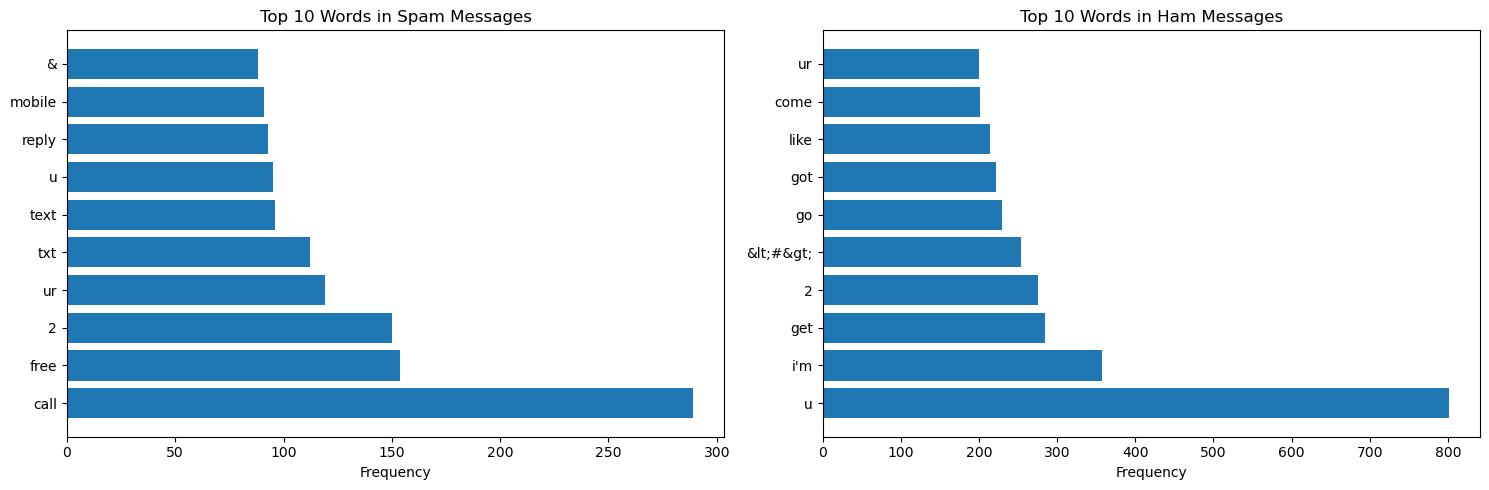


Most common words in spam messages:
call: 289
free: 154
2: 150
ur: 119
txt: 112
text: 96
u: 95
reply: 93
mobile: 91
&: 88

Most common words in ham messages:
u: 801
i'm: 358
get: 285
2: 276
&lt;#&gt;: 254
go: 230
got: 222
like: 214
come: 202
ur: 200


In [15]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def get_word_freq(texts):
    words = ' '.join(texts).split()
    # remove common English stopwords
    stops = set(stopwords.words('english'))
    words = [word for word in words if word not in stops]
    return Counter(words).most_common(10)

# frequencies for each category
spam_freq = get_word_freq(df[df['Category'] == 'spam']['Message_Clean'])
ham_freq = get_word_freq(df[df['Category'] == 'ham']['Message_Clean'])

plt.figure(figsize=(15, 5))

# spam frequencies
plt.subplot(1, 2, 1)
words, counts = zip(*spam_freq)
plt.barh(words, counts)
plt.title('Top 10 Words in Spam Messages')
plt.xlabel('Frequency')

# ham frequencies
plt.subplot(1, 2, 2)
words, counts = zip(*ham_freq)
plt.barh(words, counts)
plt.title('Top 10 Words in Ham Messages')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

print("\nMost common words in spam messages:")
for word, count in spam_freq:
    print(f"{word}: {count}")

print("\nMost common words in ham messages:")
for word, count in ham_freq:
    print(f"{word}: {count}")

### Word Frequency Analysis Results

The visualization and frequency data reveal distinct patterns between spam and legitimate messages, which I believe will help in our classification models.

1. **Spam Message Characteristics**
   - Terms focused on prompting user action/response:
     * "call" (289 occurrences) is overwhelmingly frequent, suggesting attempts to get recipients on the phone
     * "free" (154 occurrences) used as a lure
     * Multiple variations of response requests: "txt", "text", "reply"
   - Focus on mobile communication ("mobile", "txt", "ur") suggests attempts to move conversation to phone
   - The urgency and enticement patterns ("free", "call", "reply") are typical of scam attempts
   - These patterns align with common social engineering tactics to get recipients to take action


2. **Ham (Legitimate) Message Characteristics**
   - Natural conversation patterns:
     * "u" appears most frequently (801 occurrences)
     * Casual language: "i'm", "ur", "like", "got"
     * Context-appropriate actions: "go", "come", "get"
   - Language suggests existing relationships and normal daily activities
   - No pressure or urgency in the commonly used words


**Key Insights for Classification**
   - Words attempting to prompt immediate action are strong spam indicators
   - Presence of enticement terms ("free") combined with action requests raises red flags
   - Casual, relationship-based language suggests legitimate messages
   - The frequency patterns of certain words could help identify potentially malicious messages

This analysis reveals how spam messages often employ social engineering tactics through their word choice, while legitimate messages show more natural conversation patterns.


### Analysis of Special Characters and Patterns

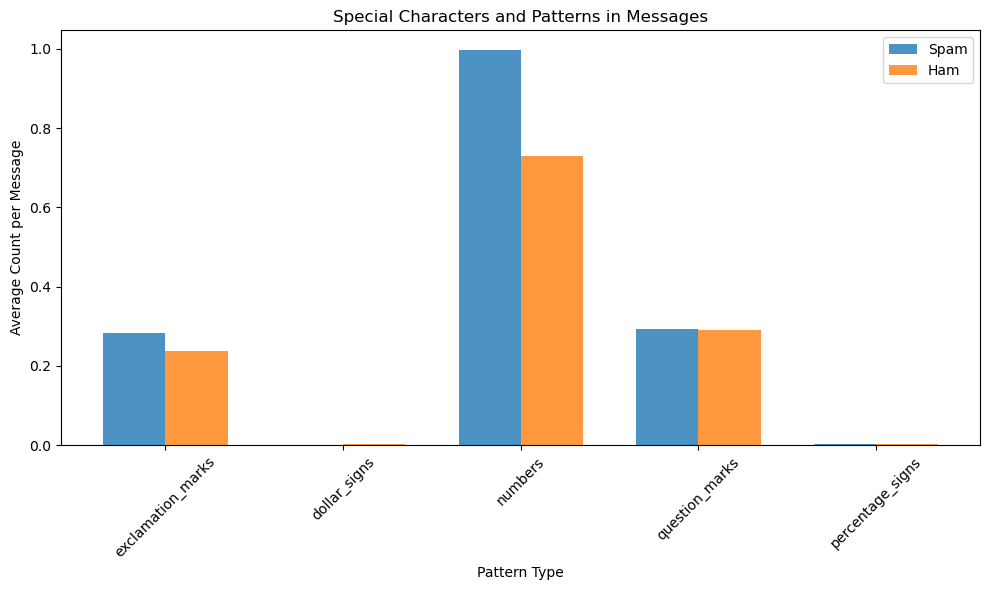


Average counts per message:

Spam messages:
exclamation_marks: 0.282
dollar_signs: 0.000
numbers: 0.997
question_marks: 0.294
percentage_signs: 0.002

Ham messages:
exclamation_marks: 0.236
dollar_signs: 0.004
numbers: 0.731
question_marks: 0.289
percentage_signs: 0.002


In [20]:
import re

def count_patterns(text):
    return {
        'exclamation_marks': text.count('!'),
        'dollar_signs': text.count('$'),
        'numbers': len(re.findall(r'\d+', text)),
        'question_marks': text.count('?'),
        'percentage_signs': text.count('%')
    }

# applies pattern counting to all messages
pattern_counts = df['Message_Clean'].apply(count_patterns)
df['exclamation_marks'] = [x['exclamation_marks'] for x in pattern_counts]
df['dollar_signs'] = [x['dollar_signs'] for x in pattern_counts]
df['numbers'] = [x['numbers'] for x in pattern_counts]
df['question_marks'] = [x['question_marks'] for x in pattern_counts]
df['percentage_signs'] = [x['percentage_signs'] for x in pattern_counts]
df_patterns = pd.DataFrame(pattern_counts.tolist())

# calculate the averages
df_patterns['Category'] = df['Category']
spam_patterns = df_patterns[df_patterns['Category'] == 'spam'].mean(numeric_only=True)
ham_patterns = df_patterns[df_patterns['Category'] == 'ham'].mean(numeric_only=True)

# bar plot
plt.figure(figsize=(10, 6))
patterns = spam_patterns.index
x = range(len(patterns))
width = 0.35

plt.bar([i - width/2 for i in x], spam_patterns, width, label='Spam', alpha=0.8)
plt.bar([i + width/2 for i in x], ham_patterns, width, label='Ham', alpha=0.8)

plt.xlabel('Pattern Type')
plt.ylabel('Average Count per Message')
plt.title('Special Characters and Patterns in Messages')
plt.xticks(x, patterns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# print averages
print("\nAverage counts per message:")
print("\nSpam messages:")
for pattern, count in spam_patterns.items():
    print(f"{pattern}: {count:.3f}")
print("\nHam messages:")
for pattern, count in ham_patterns.items():
    print(f"{pattern}: {count:.3f}")

### Special Characters and Pattern Analysis

Our analysis of special characters and patterns reveals some interesting distinctions between spam and legitimate messages:

1. **Numbers Usage**
  - Most prominent pattern in both categories
  - Spam messages average ~1.0 numbers per message
  - Ham messages average ~0.73 numbers per message
  - Higher number frequency in spam could indicate presence of phone numbers or prices

2. **Punctuation Patterns**
  - Exclamation marks:
    * Slightly more common in spam (0.28 vs 0.24 per message)
    * Suggests somewhat more dramatic language in spam
  - Question marks:
    * Nearly identical usage (~0.29 per message for both)
    * Indicates similar levels of interrogative sentences (which makes sense, questions are common in emails)

3. **Financial Indicators**
  - Dollar signs and percentage signs are very rare in both categories
  - Surprisingly, dollar signs appear slightly more in ham (0.004) than spam (0.000)
  - Percentage signs equally rare (0.002) in both categories

**Key Insights**

- The most significant difference is in number usage, with spam messages containing about 37% more numbers
- Punctuation patterns show only minor differences
- Contrary to what might be expected, explicit financial symbols ($ and %) are rarely used in either category
- These patterns suggest that number frequency could be a useful feature for our classification model

### Exploratory Data Analysis Summary

**Key Findings**

1. **Message Structure Characteristics**
   - Spam messages show remarkable consistency in length (mean: 137 characters, std: 30.4)
   - Legitimate messages are more varied (mean: 71 characters, std: 56.6)
   - Spam messages typically contain more words (24 vs 14 on average)
   - This uniformity in spam messages suggests possible automated generation

2. **Language Patterns**
   - Spam messages heavily feature action-oriented words:
     * High frequency of "call" (289 occurrences)
     * Multiple prompts for response ("txt", "reply", "text")
     * Enticement terms like "free" (154 occurrences)
   - Legitimate messages show conversational patterns:
     * Casual language ("u", "i'm", "got")
     * Natural communication flow
     * Context-appropriate actions ("go", "come")

3. **Special Character Analysis**
   - Number usage is the most distinctive pattern:
     * Spam averages 1.0 numbers per message
     * Legitimate messages average 0.73 numbers
   - Punctuation shows minor differences
   - Financial symbols ($ and %) are surprisingly rare

**Implications for Modeling**

1. **Feature Engineering Opportunities**
   - Message length and word count
   - Frequency of specific action words
   - Number density in messages
   - Punctuation patterns

2. **Potential Challenges**
   - Significant class imbalance (87.57% ham, 12.43% spam)
   - Overlap in some language patterns
   - Need to handle text preprocessing effectively

3. **Strategy for Model Development**
   - Implement class balancing techniques
   - Focus on text vectorization that captures identified patterns
   - Consider incorporating pattern-based features alongside text content

## The Model, Results, and Analysis

### Feature Engineering and Prep

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split

print("Shape of our dataset:", df.shape)

# use TF-IDF to vectorize the text for features
tfidf = TfidfVectorizer(max_features=1000)  # limit to top 1000 features to keep it simple
X_tfidf = tfidf.fit_transform(df['Message_Clean'])

# use some of the features we already calculated in EDA
engineered_features = np.column_stack([
    df['length'],              # message length
    df['word_count'],          # word count
    df['exclamation_marks'],   # count of !
    df['dollar_signs'],        # count of $
    df['numbers'],             # count of numbers
    df['question_marks'],      # count of ?
    df['percentage_signs']     # count of %
])

# scale the features
scaler = StandardScaler()
engineered_features_scaled = scaler.fit_transform(engineered_features)

# convert target variable to numeric
y = (df['Category'] == 'spam').astype(int)

# combine TF-IDF features with engineered features
from scipy.sparse import hstack
X = hstack([X_tfidf, engineered_features_scaled]).tocsr()

# print final shapes to verify
print("\nFinal feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)
print("\nFeature matrix includes:")
print(f"- {X_tfidf.shape[1]} TF-IDF features")
print(f"- {engineered_features_scaled.shape[1]} engineered features")

Shape of our dataset: (5157, 10)

Final feature matrix shape: (5157, 1007)
Target variable shape: (5157,)

Feature matrix includes:
- 1000 TF-IDF features
- 7 engineered features


This step helps us transform our raw text data into something more suitable for machine learning by doing the following

1. **TF-IDF Text Features**
   - Converted text messages into 1000 numerical features using TF-IDF vectorization
   - This captures the importance of words in each message

2. **Engineered Features**
   Based on our EDA insights, we included:
   - Message length
   - Word count
   - Special character counts:
     * Exclamation marks
     * Dollar signs
     * Numbers
     * Question marks
     * Percentage signs

3. **Data Preparation**
   - Scaled all engineered features using StandardScaler
   - Combined TF-IDF and engineered features into a single matrix
   - Converted target variable (spam/ham) to binary format (1/0)

Final output includes 1007 total features (1000 TF-IDF + 7 engineered) for 5157 messages, providing a pretty good foundation for our classification models.


## Data Splitting and Handling Imbalance

In [23]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# analyze initial class distribution
print("\nClass distribution before SMOTE:")
print("Training set:")
print("Ham:", sum(y_train == 0))
print("Spam:", sum(y_train == 1))

# handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# analyze final class distribution
print("\nClass distribution after SMOTE:")
print("Training set:")
print("Ham:", sum(y_train_balanced == 0))
print("Spam:", sum(y_train_balanced == 1))

# print the final shapes of our data
print("\nFinal dataset shapes:")
print("X_train_balanced:", X_train_balanced.shape)
print("y_train_balanced:", y_train_balanced.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Importing required libraries and preparing for data split...

Splitting data into train and test sets...

Class distribution before SMOTE:
Training set:
Ham: 3612
Spam: 513

Applying SMOTE to balance training data...

Class distribution after SMOTE:
Training set:
Ham: 3612
Spam: 3612

Final dataset shapes:
X_train_balanced: (7224, 1007)
y_train_balanced: (7224,)
X_test: (1032, 1007)
y_test: (1032,)


### Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# initialize the model
rf_model = RandomForestClassifier(
    n_estimators=100,  # starting with default parameters
    random_state=42
)

# train the model
rf_model.fit(X_train_balanced, y_train_balanced)

# make predictions
rf_predictions = rf_model.predict(X_test)

# print results
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       1.00      0.84      0.92       128

    accuracy                           0.98      1032
   macro avg       0.99      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032


Confusion Matrix:
[[904   0]
 [ 20 108]]


The Random Forest classifier showed pretty great performance in distinguishing between spam and ham messages

1. **Overall Performance**
   - Accuracy: 98% on the test set
   - Weighted F1-score: 0.98

2. **Class-Specific Performance**
   - Ham (0):
     * Precision: 0.98
     * Recall: 1.00
     * F1-score: 0.99
   - Spam (1):
     * Precision: 1.00
     * Recall: 0.84
     * F1-score: 0.92

3. **Confusion Matrix Analysis**
   - True Negatives (Correct Ham): 904
   - False Positives (Ham misclassified as Spam): 0
   - False Negatives (Spam misclassified as Ham): 20
   - True Positives (Correct Spam): 108

The model shows particularly strong performance in identifying ham messages (100% recall) with no false positives. While it has a slightly lower recall for spam messages (84%), it achieves perfect precision in spam detection, meaning when it identifies a message as spam, it's always correct.

### SVM Model

In [26]:
from sklearn.svm import SVC

# initialize the model
svm_model = SVC(kernel='linear', random_state=42)

# train the model
svm_model.fit(X_train_balanced, y_train_balanced)

# make predictions
svm_predictions = svm_model.predict(X_test)

# print results
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       904
           1       0.92      0.88      0.90       128

    accuracy                           0.97      1032
   macro avg       0.95      0.93      0.94      1032
weighted avg       0.97      0.97      0.97      1032


Confusion Matrix:
[[894  10]
 [ 16 112]]


The Support Vector Machine (SVM) classifier also demonstrated pretty strong performance

1. **Overall Performance**
   - Accuracy: 97% on the test set
   - Weighted F1-score: 0.97

2. **Class-Specific Performance**
   - Ham (0):
     * Precision: 0.98
     * Recall: 0.99
     * F1-score: 0.99
   - Spam (1):
     * Precision: 0.92
     * Recall: 0.88
     * F1-score: 0.90

3. **Confusion Matrix Analysis**
   - True Negatives (Correct Ham): 894
   - False Positives (Ham misclassified as Spam): 10
   - False Negatives (Spam misclassified as Ham): 16
   - True Positives (Correct Spam): 112

### Model Comparison

Both models showed strong performance, with some notable differences:

1. **Random Forest vs SVM**
   - Random Forest achieved slightly better overall accuracy (98% vs 97%)
   - Random Forest had perfect precision for spam (1.00 vs 0.92)
   - SVM showed more balanced recall for spam (0.88 vs 0.84)
   - SVM had some false positives (10) while Random Forest had none

2. **Trade-offs**
   - Random Forest: Better at avoiding false positives
   - SVM: More balanced performance between classes

### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# initialize Grid Search
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# fit Grid Search
rf_grid.fit(X_train_balanced, y_train_balanced)

# print results
print("\nBest parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# evaluate best model on test set
best_predictions = rf_grid.predict(X_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_predictions))


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9952929124972755

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       1.00      0.84      0.92       128

    accuracy                           0.98      1032
   macro avg       0.99      0.92      0.95      1032
weighted avg       0.98      0.98      0.98      1032


Confusion Matrix:
[[904   0]
 [ 20 108]]


We performed grid search cross-validation on the Random Forest model to optimize its performance

1. **Tuning Process**
   - Explored combinations of key parameters:
     * Number of trees (n_estimators): [100, 200]
     * Maximum tree depth (max_depth): [10, 20, None]
     * Minimum samples for split (min_samples_split): [2, 5]
   - Used 5-fold cross-validation
   - Optimized for weighted F1-score

2. **Optimal Parameters Found**
   - n_estimators: 100
   - max_depth: None (unlimited)
   - min_samples_split: 2
   - Best CV Score: 0.995 (99.5%)

3. **Final Model Performance**
   - Overall Accuracy: 98%
   - Ham Messages (0):
     * Perfect recall (1.00)
     * High precision (0.98)
   - Spam Messages (1):
     * Perfect precision (1.00)
     * Good recall (0.84)

Interestingly, the tuned model achieved the same performance metrics as our base model, suggesting our initial parameters were already well-suited for this classification task.


### Model Development and Analysis Summary

Our spam detection project followed four key steps:

1. **Feature Engineering**
  - Created 1007 features combining TF-IDF text analysis and engineered numerical features
  - Successfully converted text data into machine-learning-ready format

2. **Data Preparation**
  - Split data into train (80%) and test (20%) sets
  - Addressed class imbalance using SMOTE to create balanced training data

3. **Model Implementation**
  - Random Forest achieved 98% accuracy with perfect spam precision
  - Support Vector Machine achieved 97% accuracy with balanced performance
  - Both models demonstrated strong capability in spam detection

4. **Model Optimization**
  - Performed hyperparameter tuning on Random Forest
  - Found optimal parameters through grid search
  - Maintained high performance with 98% accuracy

Overall, our models successfully met the project goals of effectively distinguishing between spam and legitimate messages while maintaining simplicity and interpretability.


## Final Visualizations

### ROC Curve and Important Features Plot

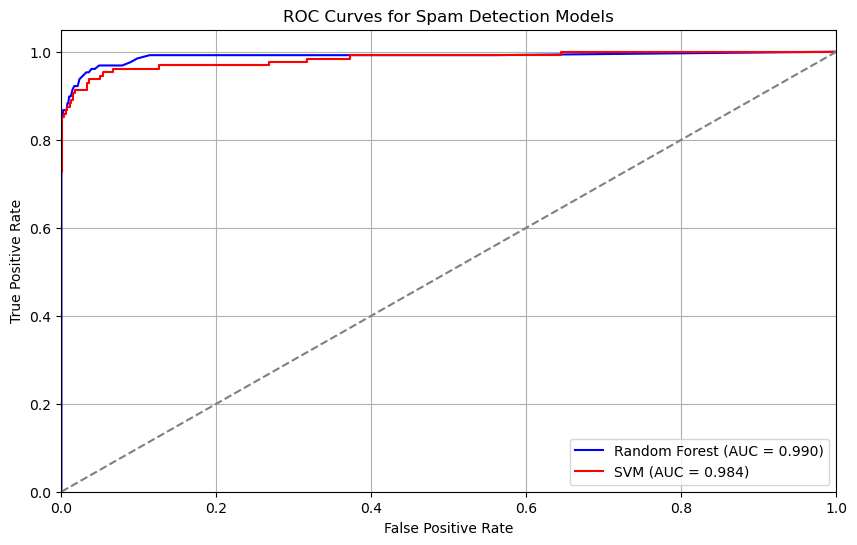

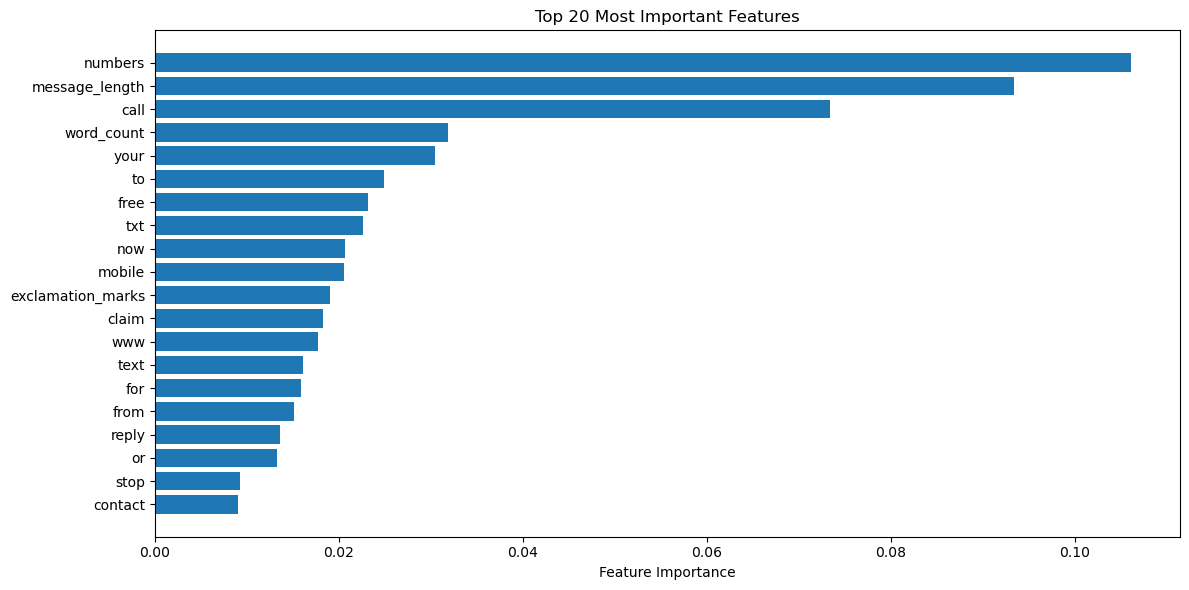

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# get probabilities for ROC curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
svm_probs = svm_model.decision_function(X_test)

# calculate ROC curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

# calculate AUC
rf_auc = auc(rf_fpr, rf_tpr)
svm_auc = auc(svm_fpr, svm_tpr)

# create ROC plot
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(svm_fpr, svm_tpr, color='red', label=f'SVM (AUC = {svm_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Spam Detection Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# feature importance plot for random forest
feature_names = tfidf.get_feature_names_out().tolist() + [
    'message_length', 'word_count', 'exclamation_marks',
    'dollar_signs', 'numbers', 'question_marks', 'percentage_signs'
]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(12, 6))
plt.title('Top 20 Most Important Features')
plt.barh(range(20), importances[indices])
plt.yticks(range(20), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into our model performance and feature importance:

1. **Model Performance (ROC Curves)**
   - Both models show excellent performance with AUC scores > 0.98
   - Random Forest slightly edges out SVM (AUC 0.990 vs 0.984)
   - The curves' proximity to the top-left corner indicates strong classification ability
   - Results confirm our earlier accuracy and F1-score findings

2. **Feature Importance Analysis**
   - Numerical elements (numbers in messages) are the strongest spam indicators
   - Message structure (length and word count) plays a crucial role
   - Action-oriented terms ("call") are highly predictive of spam
   - Promotional language ("free", "txt") shows moderate importance
   - Engineered features like exclamation marks proved valuable

These results validate our EDA findings and feature engineering choices, showing that both textual content and message structure contribute to effective spam detection.


### Learning Curves Visualization

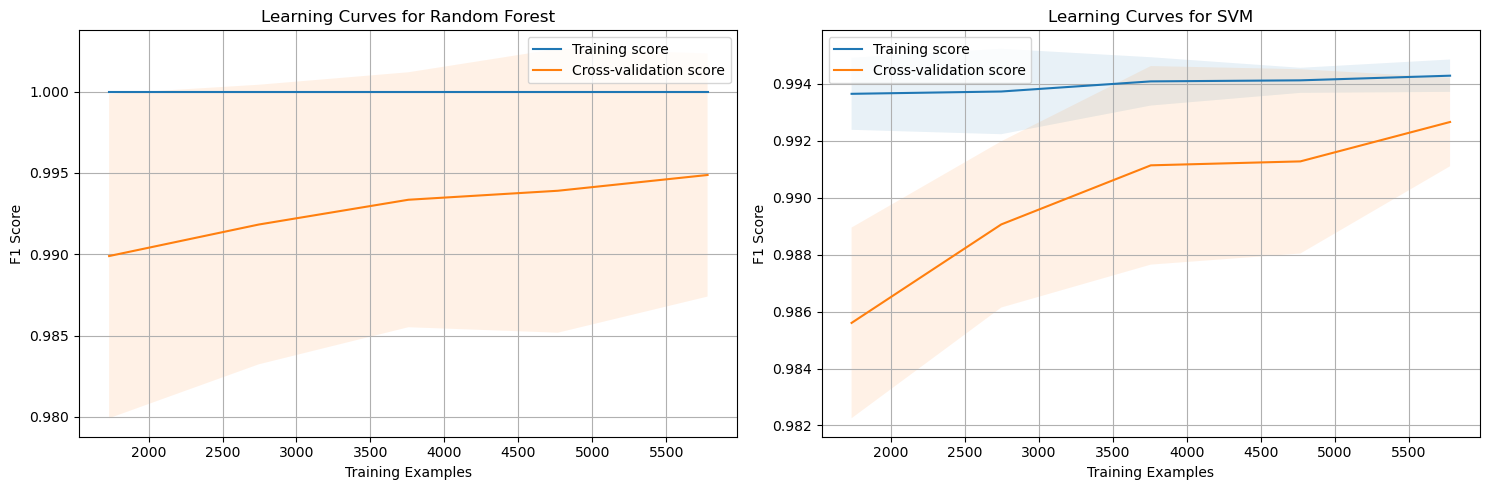

In [31]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curves(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=np.linspace(0.3, 1.0, 5),
        cv=5,
        n_jobs=-1,
        scoring='f1_weighted',
        shuffle=True,
        random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Cross-validation score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)

    plt.ylabel('F1 Score')
    plt.xlabel('Training Examples')
    plt.title(f'Learning Curves for {title}')
    plt.legend(loc='best')
    plt.grid(True)

plt.figure(figsize=(15, 5))

# random forest
plt.subplot(1, 2, 1)
plot_learning_curves(rf_model, X_train_balanced, y_train_balanced, 'Random Forest')

# SVM
plt.subplot(1, 2, 2)
plot_learning_curves(svm_model, X_train_balanced, y_train_balanced, 'SVM')

plt.tight_layout()
plt.show()

The learning curves provide valuable insights into how our models learn and perform with different amounts of training data:

1. **Random Forest Performance**
   - Shows remarkably stable performance across different training sizes
   - Training score (blue) maintains high accuracy around 1.0
   - Cross-validation score (orange) gradually improves with more data
   - Small gap between training and validation scores indicates good generalization
   - Minimal overfitting despite high performance

2. **SVM Performance**
   - Similar high performance but with slightly different learning dynamics
   - Training score stays consistently high (above 0.99)
   - Cross-validation score shows steeper improvement with more data
   - Slightly larger gap between training and validation scores compared to Random Forest
   - Benefits more from additional training examples

Both models show strong performance characteristics with:
- Very high F1 scores (> 0.98) across all training sizes
- Good generalization capability (small gaps between training and validation)
- Stability in performance as training data increases
- No significant signs of overfitting or underfitting

This analysis confirms both models are well-suited for our spam detection task, with Random Forest showing slightly more stable learning characteristics.
